In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn
#use pandas for data handling and analysis
#numpy for numerical operations and array support
#matplotlib & seaborn for data visualization
#scikit-learn for building and evaluating ml models.

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#use pd,np are common aliases for padas and numpy
#use plt and sns are used for creating plots and visualizations

In [3]:
df = pd.read_csv('strokedata.csv') #loads the dataset in to pandas DataFrame named df

In [4]:
print(df.head())  #shows the first 5 rows of the dataset.

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [5]:
print(df.info()) #gives the summary of the DataFrame
#(Useful to identify missing values and understand what type of data you are dealing with)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [6]:
df.describe() #Provides descriptive statistics for numerical columns in the dataset

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
#Univariate_non-graphical_EDA-Gender
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [8]:
#Univariate_non-graphical_EDA-Marital Staus
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [9]:
#Univariate_non-graphical_EDA-Work Type
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [10]:
#Univariate_non-graphical_EDA-Stroke
df['stroke'].value_counts() #help to understand how age is distributed and see if it's skewed or normally distributed

stroke
0    4861
1     249
Name: count, dtype: int64

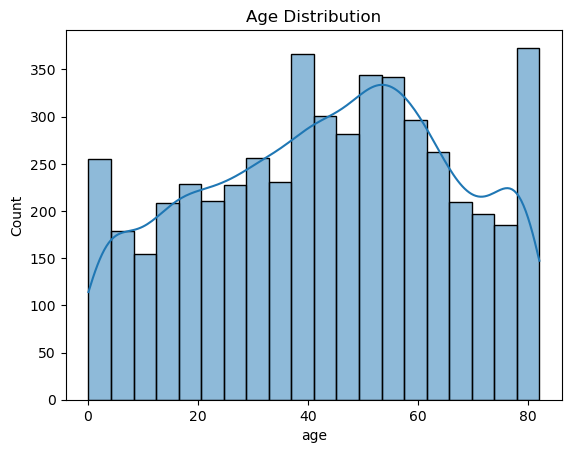

In [11]:
#UNIVARIATE_GRAPHICAL_EDA-Age Distribution
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

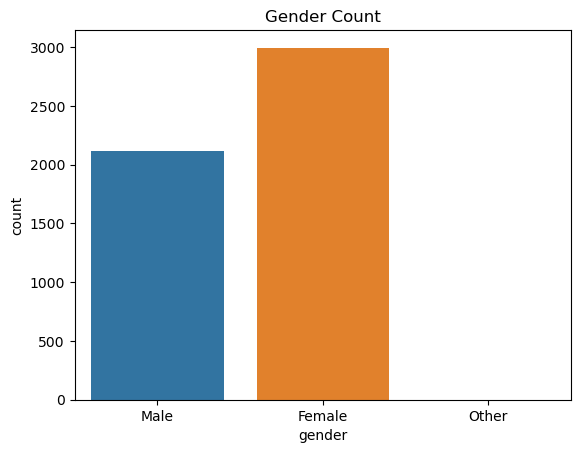

In [12]:
# Count plot for 'gender'
sns.countplot(x='gender', data=df)
plt.title("Gender Count")
plt.show()

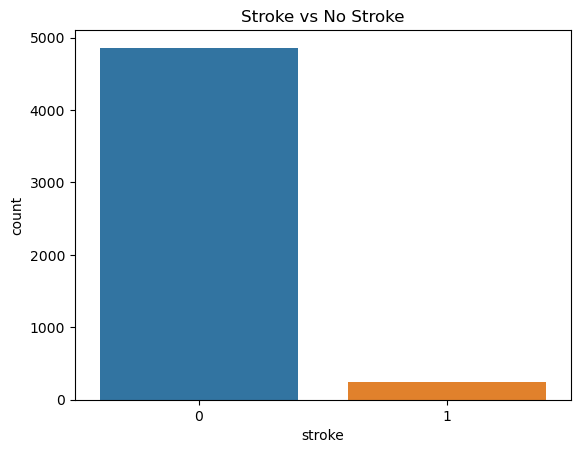

In [13]:
# Count plot for 'stroke'
sns.countplot(x='stroke', data=df)
plt.title("Stroke vs No Stroke")
plt.show()

In [14]:
#MULTIVARIATE NON-GRAPHICAL EDA
#Crosstab: stroke vs smoking_status
pd.crosstab(df['stroke'], df['smoking_status'], normalize='index')

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,0.307961,0.167661,0.370706,0.153672
1,0.188755,0.281124,0.361446,0.168675


In [15]:
# Correlation matrix for numerical features
# Computes Pearson correlation coefficients between numeric features
df[['age', 'bmi', 'avg_glucose_level', 'stroke']].corr()

,age,bmi,avg_glucose_level,stroke
age,1.000000,0.333398,0.238171,0.245257
bmi,0.333398,1.000000,0.175502,0.042374
avg_glucose_level,0.238171,0.175502,1.000000,0.131945
stroke,0.245257,0.042374,0.131945,1.000000


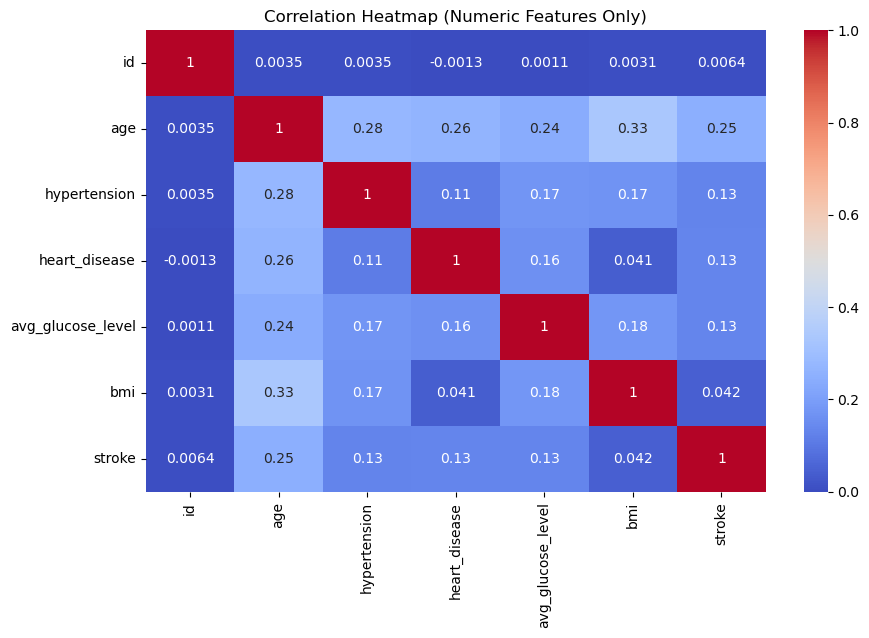

In [16]:
#  MULTIVARIATE GRAPHICAL EDA
#Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
#  Heatmap of correlations (only numeric columns)
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

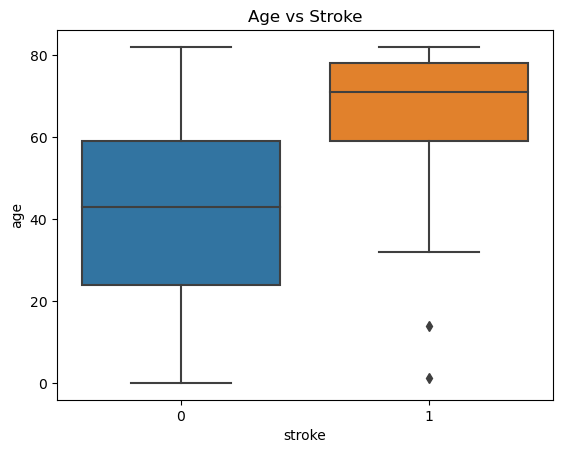

In [17]:
#  Boxplot: age vs stroke
sns.boxplot(x='stroke', y='age', data=df)
plt.title("Age vs Stroke")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


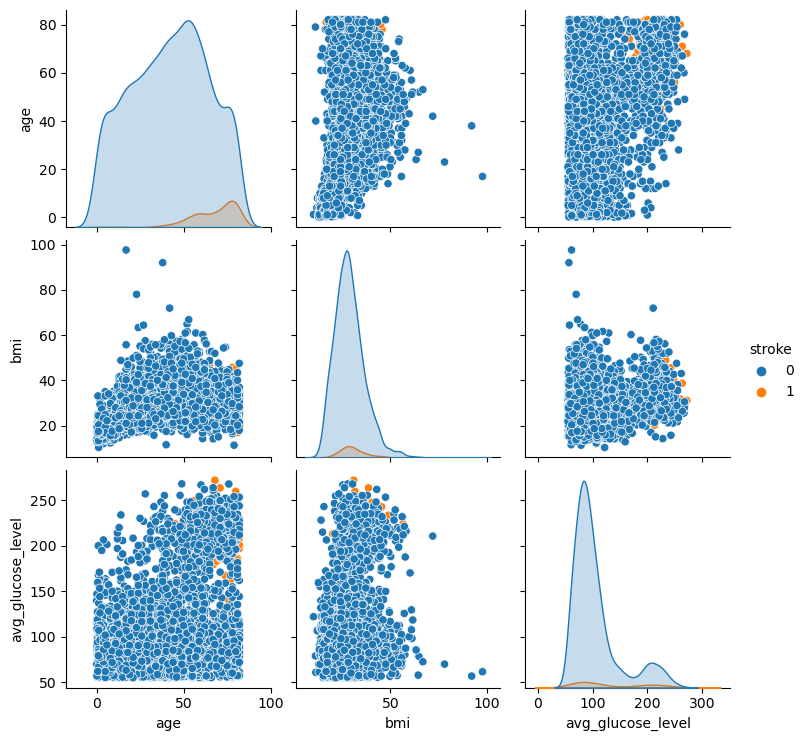

In [18]:
#  Pairplot for selected features
sns.pairplot(df[['age', 'bmi', 'avg_glucose_level', 'stroke']], hue='stroke')
plt.show()

In [19]:
#DATA PREPROCESSING
#handling missing data(1)
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
#  Fill missing BMI with mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [21]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [22]:
#Encode Categorical Variables(2)
from sklearn.preprocessing import LabelEncoder

In [23]:
#  Label Encoding for binary categorical columns
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])        # Male=1, Female=0 (or other depending on data)
df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])

In [24]:
#  One-hot encoding for other categorical features
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)

In [25]:
#Scale Numeric Features(3)
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

In [27]:
#Split the data(4)
from sklearn.model_selection import train_test_split

In [28]:
# Separate features and label
X = df.drop('stroke', axis=1)
y = df['stroke']

In [29]:
#  Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
#MODEL FITTING-LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [31]:
# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
# Predict on test set
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

In [33]:
#EVALUATION – LOGISTIC REGRESSION
#  Classification Report
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



In [34]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Confusion Matrix:
 [[970   2]
 [ 50   0]]


In [35]:
#  Accuracy & ROC-AUC
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))

Accuracy: 0.949119373776908
ROC-AUC Score: 0.7837242798353911


In [36]:
#MODEL FITTING – RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

In [37]:
#  Initialize and train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
#  Predict
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [39]:
#EVALUATION – RANDOM FOREST
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022



In [40]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
 [[972   0]
 [ 49   1]]


In [41]:
# Accuracy & ROC-AUC
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

Accuracy: 0.952054794520548
ROC-AUC Score: 0.8100205761316872


In [42]:
#MODEL FITTING-XGBoost Classifier
from xgboost import XGBClassifier

In [43]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

C:\Users\NETHMI APSARA\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [08:56:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [44]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

In [45]:
print("XGBoost Classifier Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.31      0.08      0.13        50

    accuracy                           0.95      1022
   macro avg       0.63      0.54      0.55      1022
weighted avg       0.92      0.95      0.93      1022



In [46]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Confusion Matrix:
 [[963   9]
 [ 46   4]]


In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))

Accuracy: 0.9461839530332681
ROC-AUC Score: 0.8104732510288065


In [48]:
#MODEL FITTING-KNN
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
import numpy as np

# Ensure X_test is a NumPy array with correct dtype
X_test_knn = np.array(X_test).astype(np.float64)

# Predict
y_pred_knn = knn.predict(X_test_knn)
y_prob_knn = knn.predict_proba(X_test_knn)[:, 1]

# Evaluation
print("KNN Classifier Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_knn))



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNN Classifier Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Confusion Matrix:
 [[972   0]
 [ 50   0]]
Accuracy: 0.9510763209393346
ROC-AUC Score: 0.5155761316872428


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no

In [51]:
from sklearn.svm import SVC

In [52]:
svm = SVC(probability=True)  # Set to True for predict_proba
svm.fit(X_train, y_train)

SVC(probability=True)

In [53]:
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

In [54]:
print("SVM Classifier Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classifier Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Confusion Matrix:
 [[972   0]
 [ 50   0]]


In [56]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_svm))

Accuracy: 0.9510763209393346
ROC-AUC Score: 0.5088065843621399


In [57]:
# Model names
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'KNN', 'SVM']

# Accuracy scores
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm)
]

# ROC-AUC scores
roc_aucs = [
    roc_auc_score(y_test, y_prob_lr),
    roc_auc_score(y_test, y_prob_rf),
    roc_auc_score(y_test, y_prob_xgb),
    roc_auc_score(y_test, y_prob_knn),
    roc_auc_score(y_test, y_prob_svm)
]

# Print comparison
for i in range(len(models)):
    print(f"{models[i]} - Accuracy: {accuracies[i]:.4f} | ROC-AUC: {roc_aucs[i]:.4f}")


Logistic Regression - Accuracy: 0.9491 | ROC-AUC: 0.7837
Random Forest - Accuracy: 0.9521 | ROC-AUC: 0.8100
XGBoost - Accuracy: 0.9462 | ROC-AUC: 0.8105
KNN - Accuracy: 0.9511 | ROC-AUC: 0.5156
SVM - Accuracy: 0.9511 | ROC-AUC: 0.5088


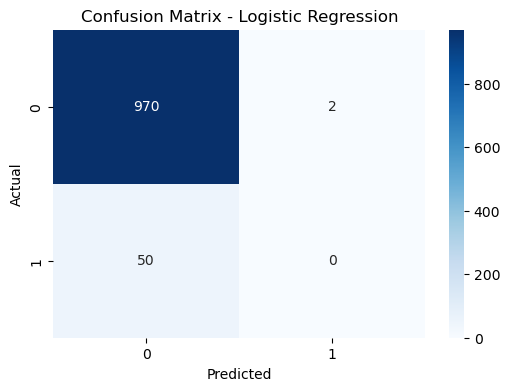

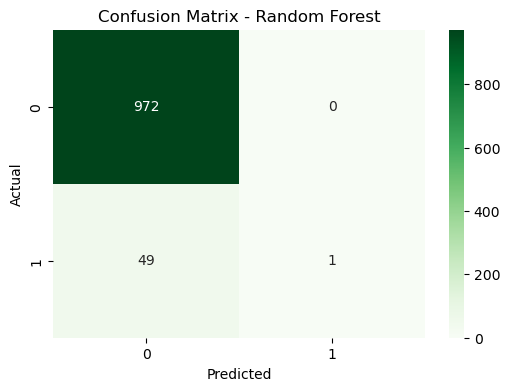

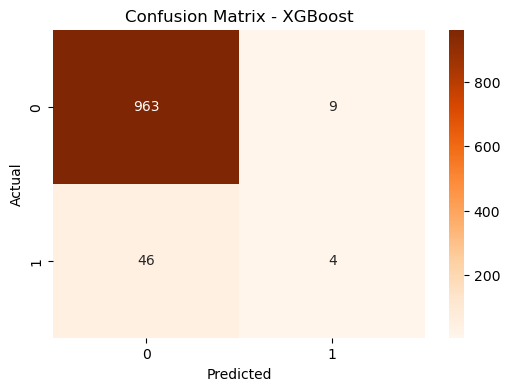

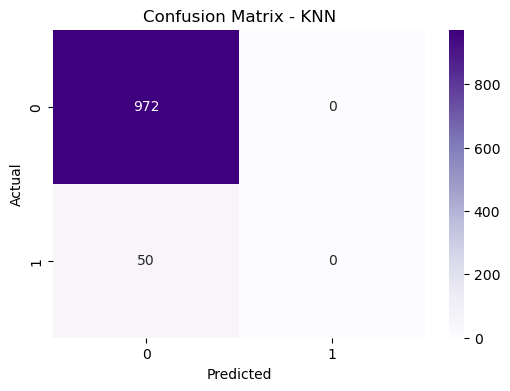

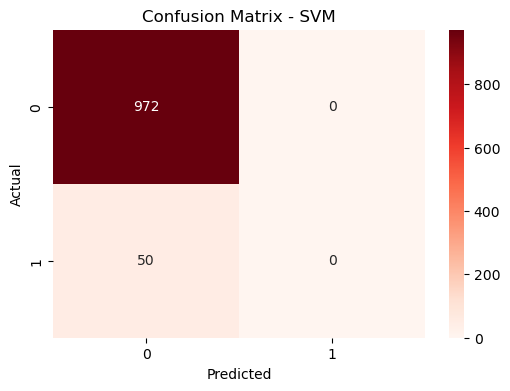

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for XGBoost
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for KNN
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for SVM
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


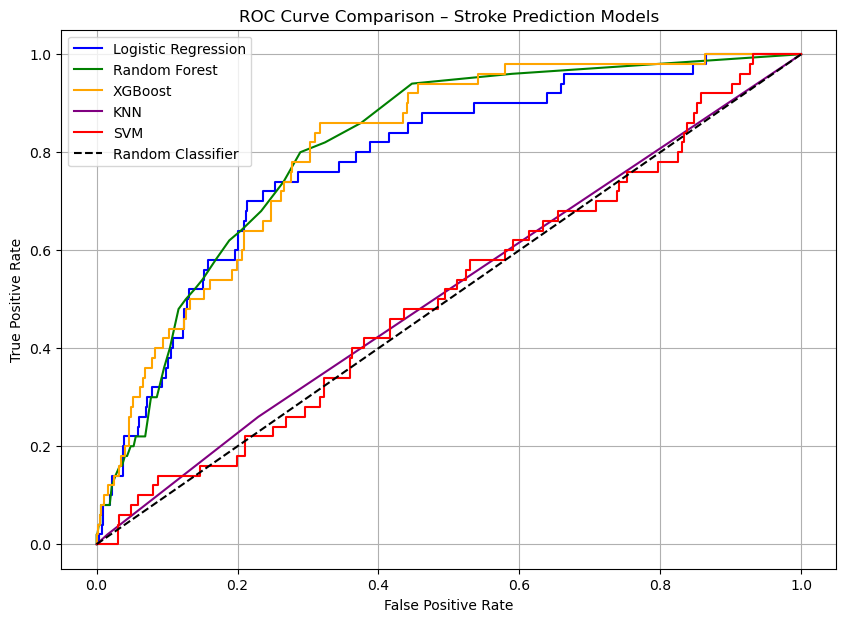

In [59]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# ROC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# ROC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# ROC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

# ROC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

# ROC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

# Plot all ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression', color='blue')
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color='green')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost', color='orange')
plt.plot(fpr_knn, tpr_knn, label='KNN', color='purple')
plt.plot(fpr_svm, tpr_svm, label='SVM', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison – Stroke Prediction Models')
plt.legend()
plt.grid(True)
plt.show()


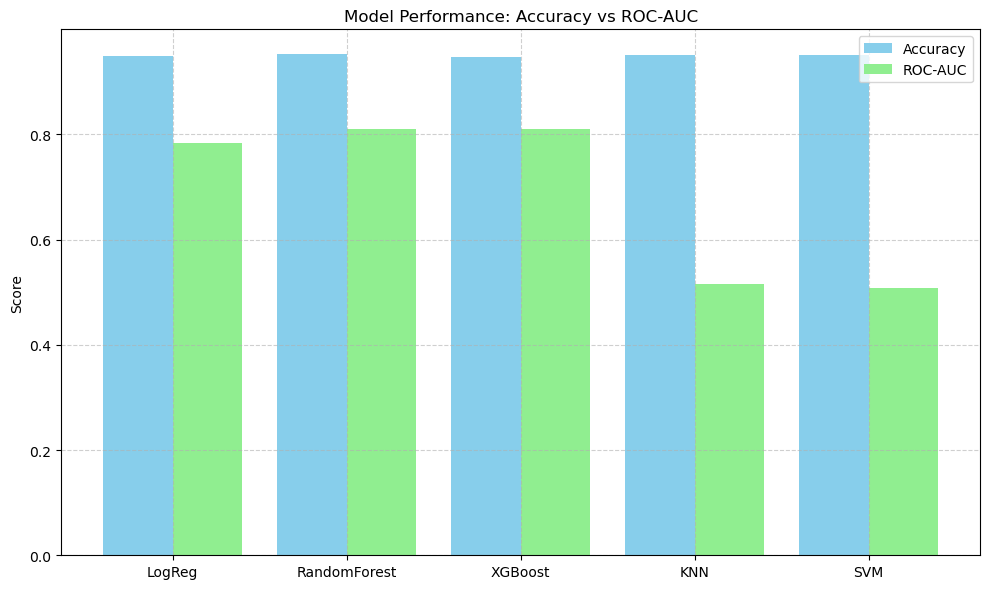

In [60]:
import matplotlib.pyplot as plt

# Model names
models = ['LogReg', 'RandomForest', 'XGBoost', 'KNN', 'SVM']

# Accuracy & ROC-AUC (from your earlier evaluation)
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm)
]

roc_aucs = [
    roc_auc_score(y_test, y_prob_lr),
    roc_auc_score(y_test, y_prob_rf),
    roc_auc_score(y_test, y_prob_xgb),
    roc_auc_score(y_test, y_prob_knn),
    roc_auc_score(y_test, y_prob_svm)
]

#  Bar plot
x = range(len(models))
plt.figure(figsize=(10, 6))
plt.bar(x, accuracies, width=0.4, label='Accuracy', align='center', color='skyblue')
plt.bar([i + 0.4 for i in x], roc_aucs, width=0.4, label='ROC-AUC', align='center', color='lightgreen')

plt.xticks([i + 0.2 for i in x], models)
plt.ylabel("Score")
plt.title("Model Performance: Accuracy vs ROC-AUC")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [61]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [62]:
import joblib

In [63]:
joblib.dump(rf, "best_best_model_rf.pkl")

['best_best_model_rf.pkl']

In [64]:
print(" Model saved as best_best_model_rf.pkl")

 Model saved as best_best_model_rf.pkl
